# DL FINAL PROJECT
## Author: Asuman Celik

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')


In [36]:
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)

In [37]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Check the Balance of dataset

In [ ]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


## Visualize the Distribution of Dataset

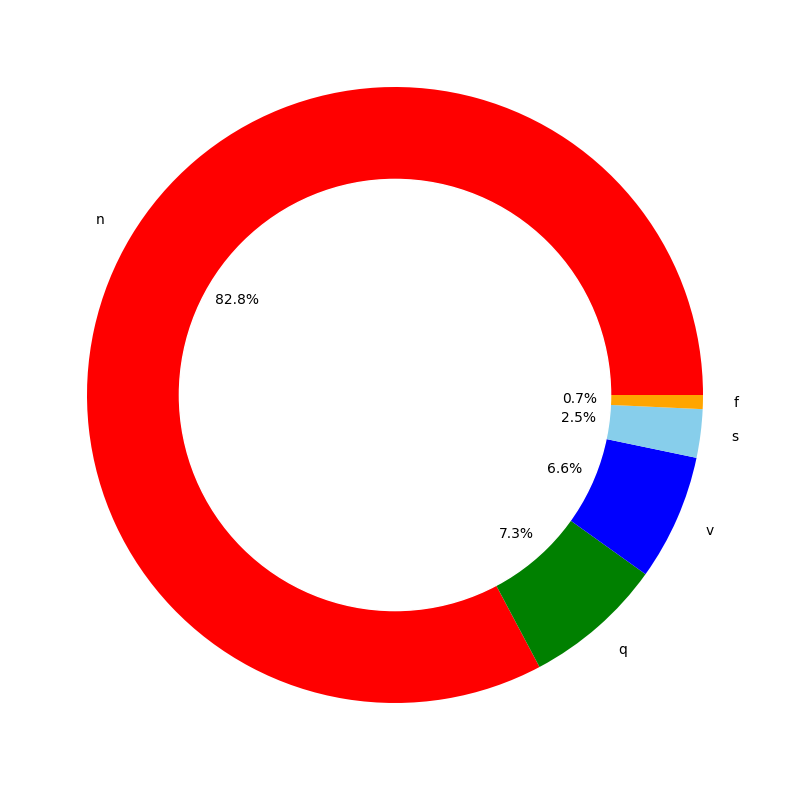

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Maintaining the class balance is important. Resampling technique is used to balance the classes.

In [47]:
# resampling to balance classes

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(train_df.drop(187,axis=1), train_df[187])
print(x_train.shape)
print(y_train.shape)


(362355, 187)
(362355,)


In [41]:
#select number of trainsing samples to use
#Ns = equilibre[0]
#print(Ns)

72471


In [48]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=Ns,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=Ns,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=Ns,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=Ns,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=Ns,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [49]:
equilibre=train_df[187].value_counts()
print(equilibre)

0.0    72471
1.0    72471
2.0    72471
3.0    72471
4.0    72471
Name: 187, dtype: int64


In [50]:
df_0.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
35402,0.994152,0.675439,0.526316,0.263158,0.195906,0.090643,0.073099,0.073099,0.058480,0.032164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51816,0.978892,0.915567,0.609499,0.350923,0.284960,0.300792,0.266491,0.261214,0.250660,0.253298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3198,1.000000,0.618421,0.072368,0.134868,0.226974,0.207237,0.171053,0.164474,0.174342,0.184211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37187,1.000000,0.963907,0.762208,0.545648,0.322718,0.282378,0.261146,0.248408,0.220807,0.222930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21507,0.978151,1.000000,0.848740,0.557983,0.517647,0.559664,0.576471,0.603361,0.594958,0.594958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
74044,1.000000,0.814645,0.176201,0.068650,0.194508,0.249428,0.290618,0.279176,0.242563,0.256293,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74049,0.904389,0.761755,0.159875,0.000000,0.216301,0.224138,0.244514,0.255486,0.239812,0.233542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74392,1.000000,0.952790,0.304721,0.021459,0.111588,0.163090,0.141631,0.214592,0.244635,0.193133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74090,1.000000,0.993856,0.468510,0.000000,0.219662,0.330261,0.336406,0.344086,0.348694,0.350230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74193,0.985714,0.862857,0.220000,0.031429,0.180000,0.248571,0.274286,0.280000,0.294286,0.280000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
df_1_upsample.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
73832,1.000000,0.693252,0.098160,0.144172,0.134969,0.141104,0.119632,0.122699,0.122699,0.128834,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74155,1.000000,0.864000,0.224000,0.000000,0.064000,0.136000,0.148000,0.196000,0.228000,0.212000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73360,1.000000,0.862534,0.415094,0.115903,0.086253,0.115903,0.075472,0.061995,0.032345,0.043127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73950,0.874494,0.789474,0.198381,0.000000,0.089069,0.145749,0.109312,0.186235,0.214575,0.157895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
74658,0.928270,0.725738,0.118143,0.000000,0.075949,0.097046,0.088608,0.164557,0.181435,0.130802,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


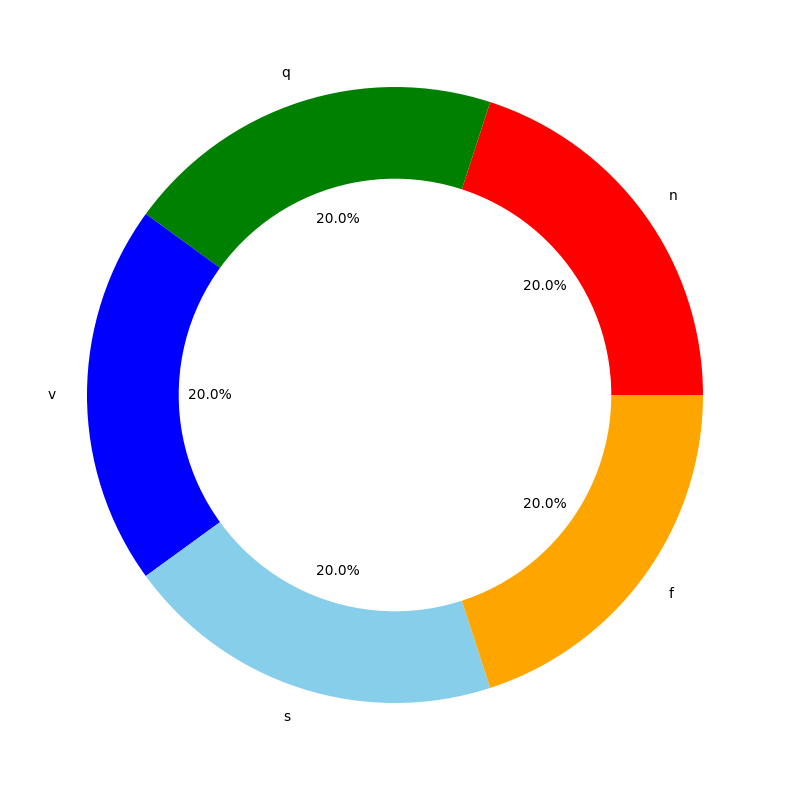

In [53]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## GENERALIZE DATA BY ADDING NOISE

In [57]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.1,186)
    return (signal+noise)


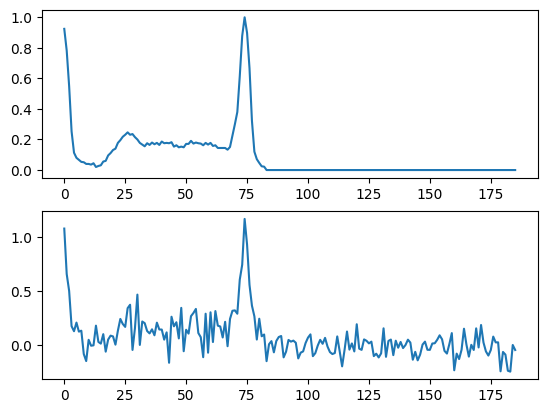

In [58]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()



In [59]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [60]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

## BUILDING MODEL

In [61]:
def network(X_train,y_train,X_test,y_test):


    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)


    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])


    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [62]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))

    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']

    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)


In [64]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)



Epoch 1/40
11324/11324 [==============================] - 373s 32ms/step - loss: 0.2125 - accuracy: 0.9219 - val_loss: 0.2470 - val_accuracy: 0.9107
Epoch 2/40
11324/11324 [==============================] - 366s 32ms/step - loss: 0.1176 - accuracy: 0.9572 - val_loss: 0.1875 - val_accuracy: 0.9432
Epoch 3/40
11324/11324 [==============================] - 361s 32ms/step - loss: 0.0945 - accuracy: 0.9660 - val_loss: 0.1710 - val_accuracy: 0.9426
Epoch 4/40
11324/11324 [==============================] - 365s 32ms/step - loss: 0.0819 - accuracy: 0.9704 - val_loss: 0.1921 - val_accuracy: 0.9402
Epoch 5/40
11324/11324 [==============================] - 353s 31ms/step - loss: 0.0728 - accuracy: 0.9740 - val_loss: 0.1892 - val_accuracy: 0.9406
Epoch 6/40
11324/11324 [==============================] - 347s 31ms/step - loss: 0.0669 - accuracy: 0.9760 - val_loss: 0.1640 - val_accuracy: 0.9508
Epoch 7/40
11324/11324 [==============================] - 349s 31ms/step - loss: 0.0622 - accuracy: 0.9777

Accuracy: 95.08%


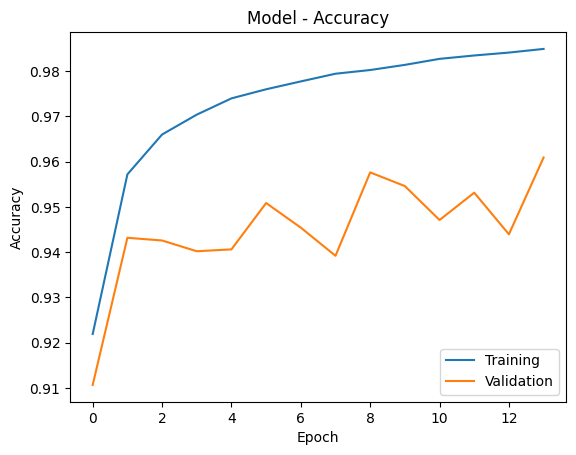

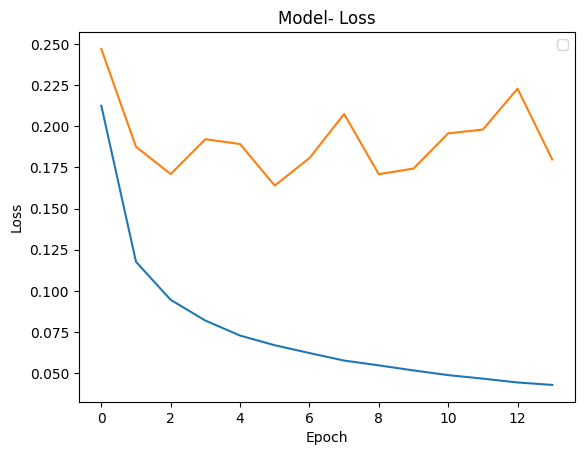

685/685 [==============================] - 11s 15ms/step


In [65]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)


Normalized confusion matrix


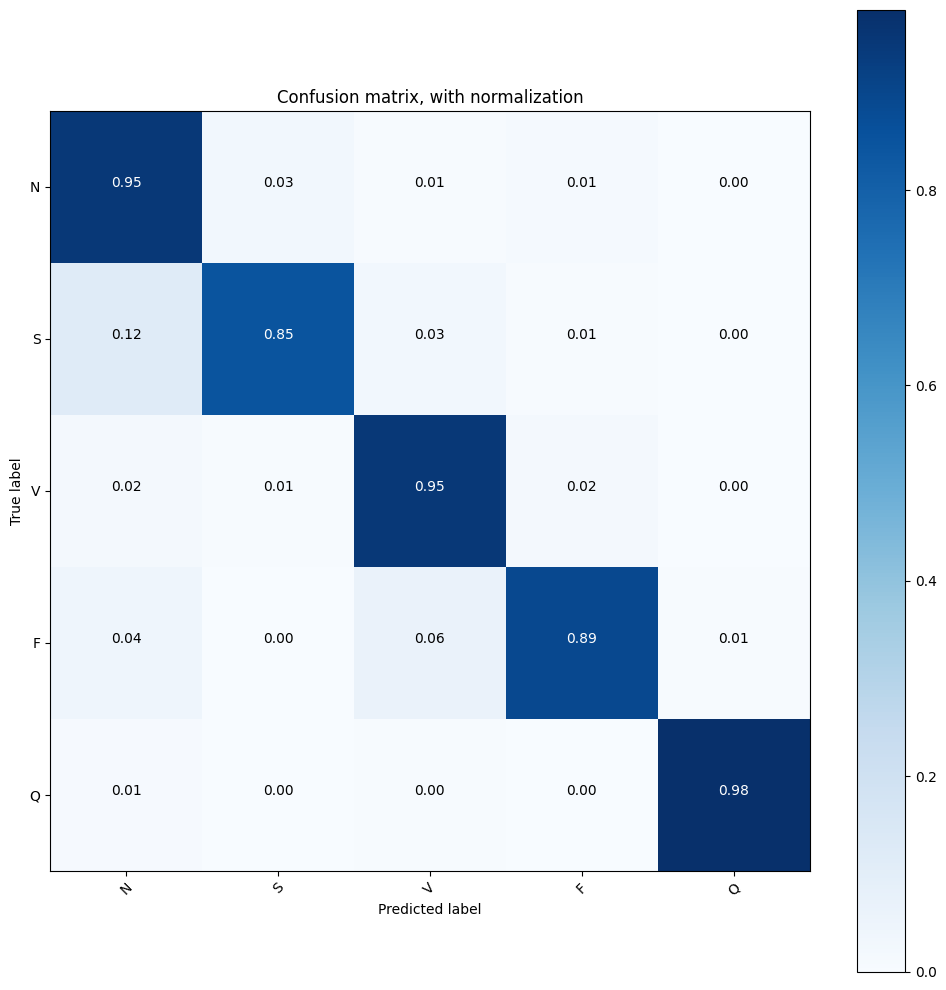

In [66]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()



We underlign that two class(supraventricular and fusion) is weeker than the other. maybe due to less exemple in the starter dataset. I will try to improve in the next version.